<h1>Decision Tree</h1>

<p>In this tutorial we will see how to use a decision tree for classificatino using the iris dataset.<br>
Visualization of both the result and the decision tree itself are also provided.</p>
<p>As usual we start by importing all necessary packages ...</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

<p>... and the iris dataset.</p>

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,0:3:2]
y = iris.target

<p>As for the example for the k-Nearest Neighbor method we only keep two features of the whole dataset.</p>
<p>Then we can apply a decision tree classification, constraining the maximum depth of the tree to be 4 :</p>

In [3]:
from sklearn import tree
dtr = tree.DecisionTreeClassifier(max_depth=4)
dtr.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

<p>In order to visualize the classification result we are going to ask the predictino for a collectino of points mapping the features space.</p>

In [4]:
xx,yy = np.meshgrid(np.linspace(0.0,10.0,201),np.linspace(0.0,10.0,201))
pred = dtr.predict(np.c_[xx.ravel(),yy.ravel()])
Z = pred.reshape(np.shape(xx))

<IPython.core.display.Javascript object>


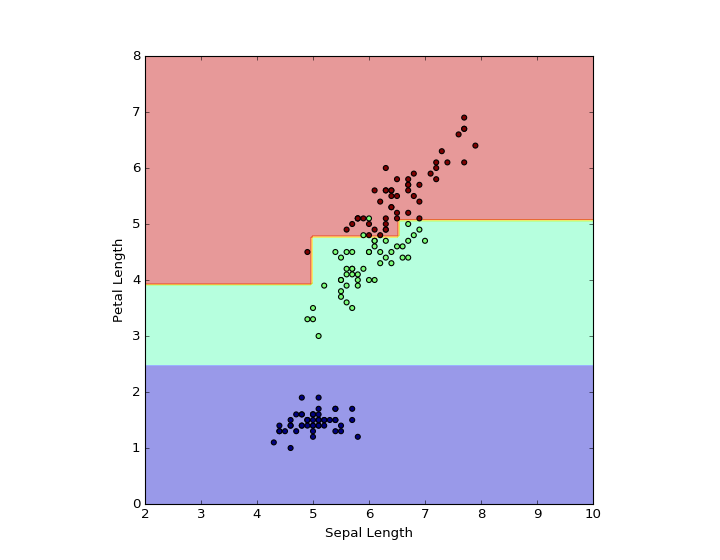

(0.0, 8.0)

In [6]:
plt.figure(figsize=(9,7))
plt.contourf(xx,yy,Z,alpha=0.4)
plt.scatter(X.T[0],X.T[1],c=y)
plt.axis('scaled')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.xlim(2.0,10.0)
plt.ylim(0.0,8.0)

<p>Let's now export the decision tree to a pdf file</p>

In [11]:
import pydot
from sklearn.externals.six import StringIO

dot_data = StringIO()
f = tree.export_graphviz(dtr,out_file=dot_data,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('iris.pdf')

NameError: global name 'dot_parser' is not defined

In [12]:
#Or we can display it
from IPython.display import Image  
Image(graph.create_png())

NameError: name 'graph' is not defined